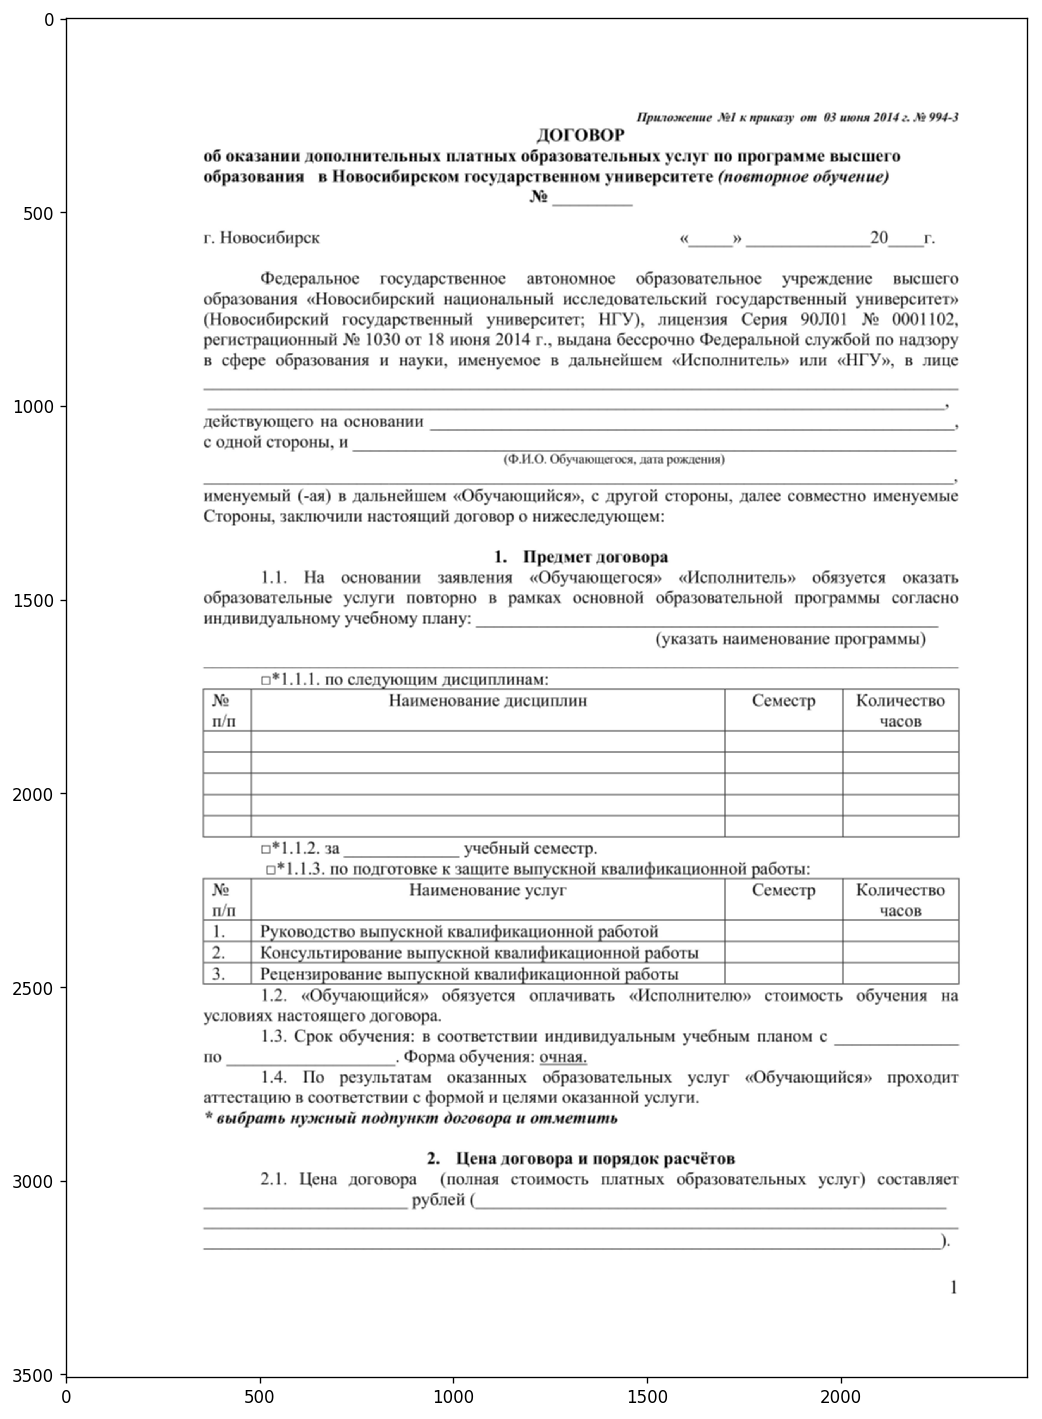

In [52]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def plt_imshow(img):
    fig = plt.figure(figsize=(17, 15), dpi=120, facecolor='w', edgecolor='k')
    plt.imshow(img, cmap='gray')

def thres(img):
    dst = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 3)
    # _, dst = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
    return dst
    
def morph(img):
    kernel = np.ones((3,50), np.uint8)
    dst = cv.morphologyEx(img, cv.MORPH_DILATE, kernel)
    return dst

filename = '../resources/repeat/repeat_course_1.jpg'
img = cv.imread(filename, 0)

blur = cv.GaussianBlur(img, (5,5), 7)
th = thres(blur)
plt_imshow(blur)
dst = morph(th)

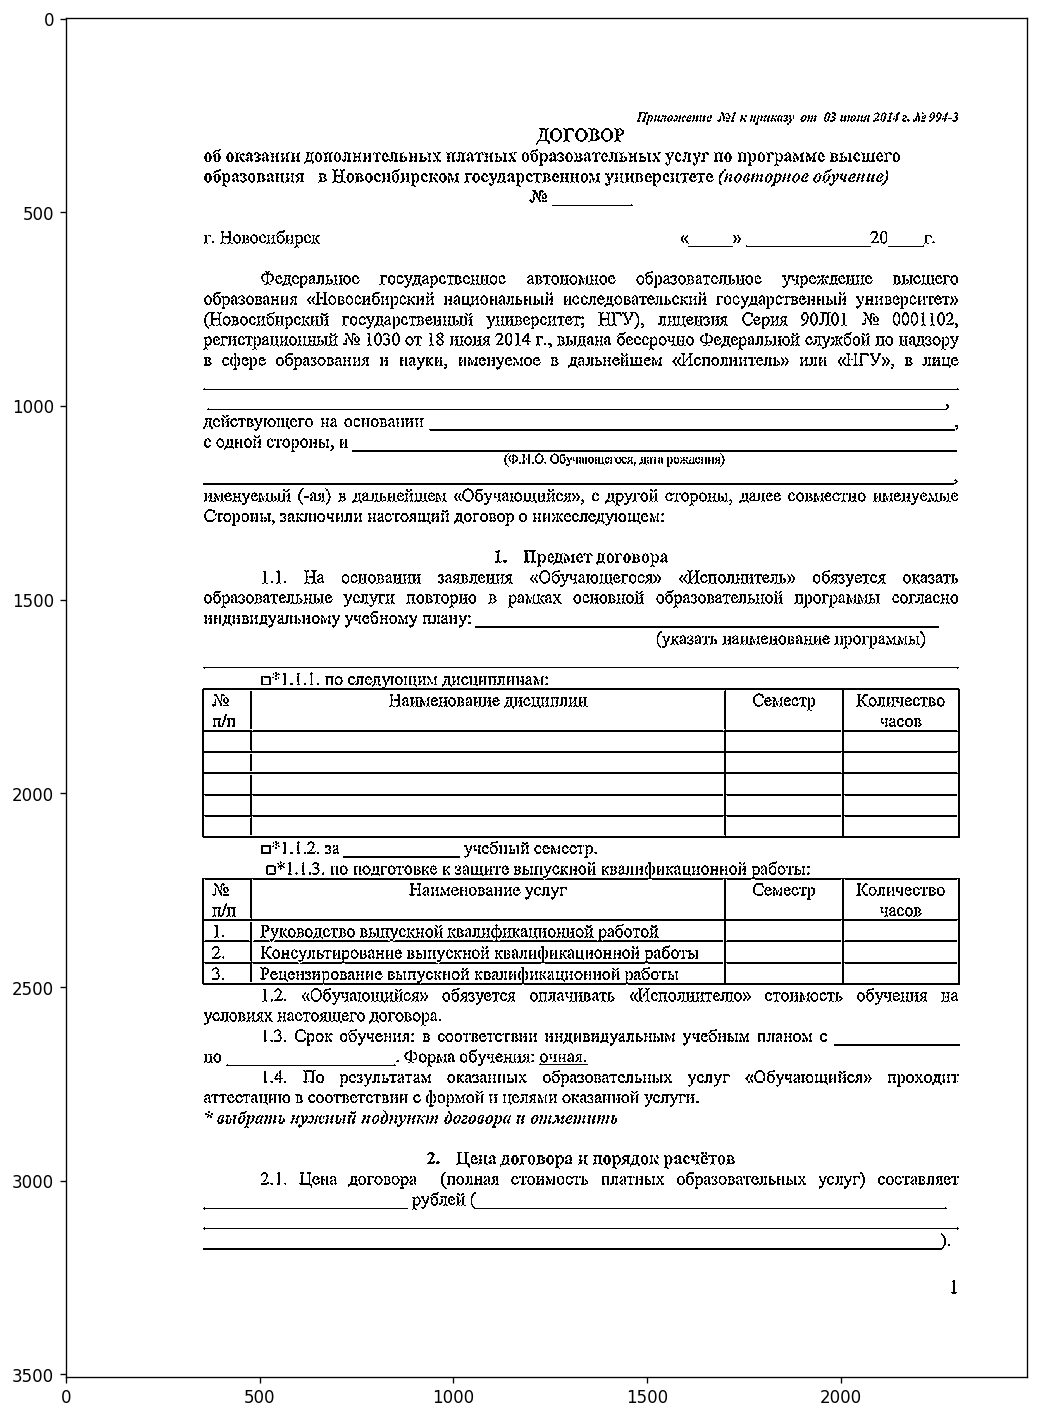

In [53]:
plt_imshow(th)

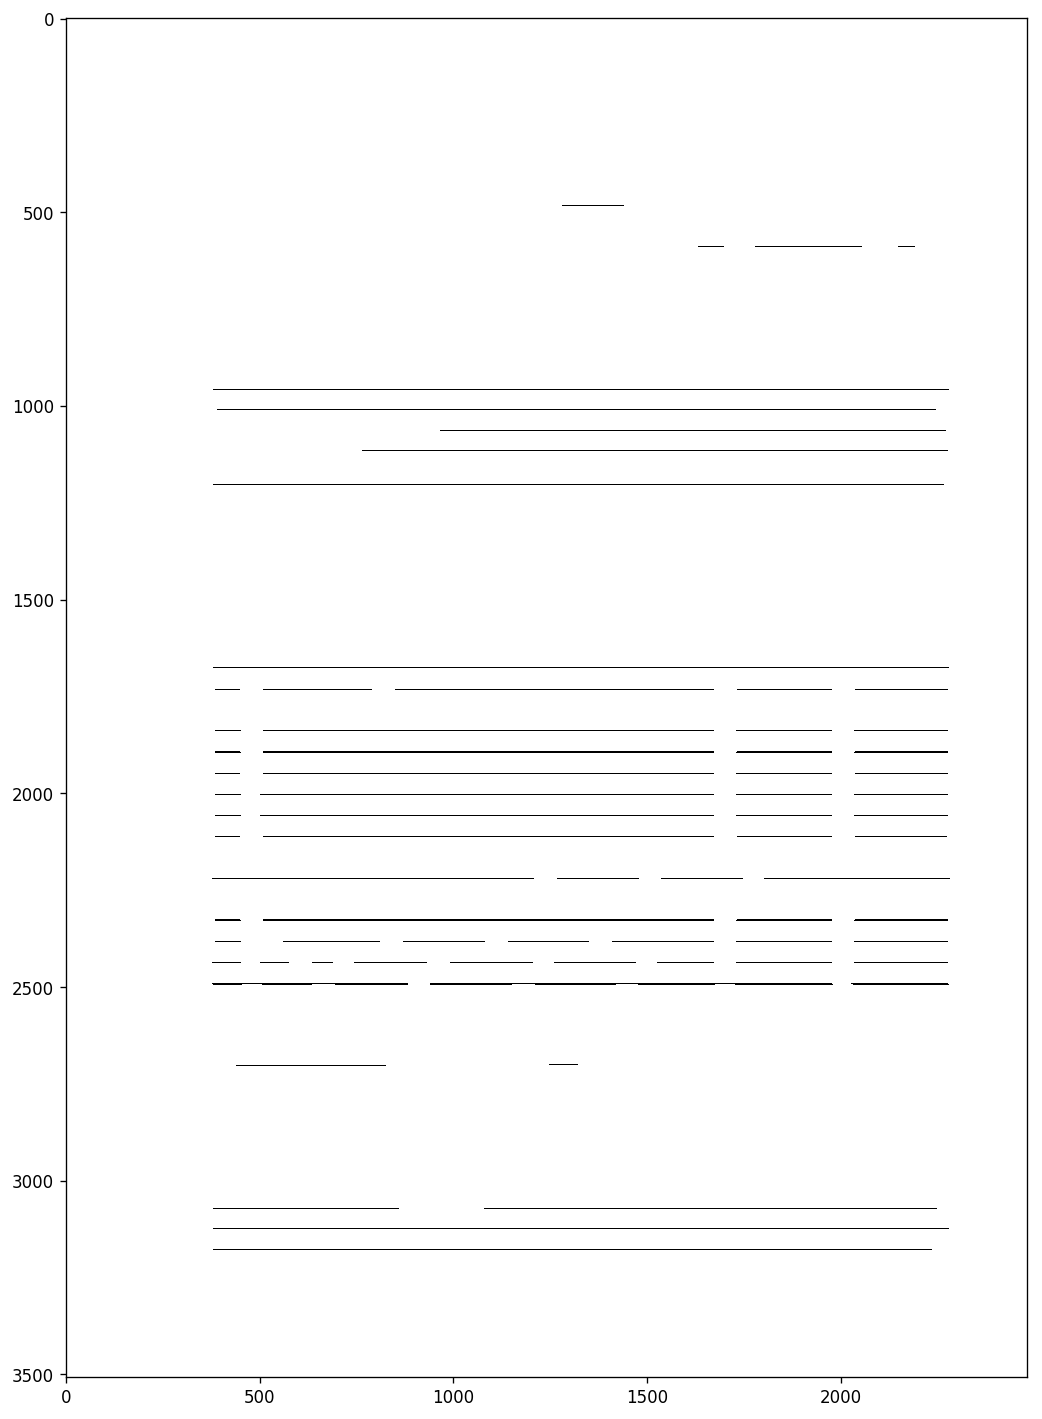

In [54]:
plt_imshow(dst)

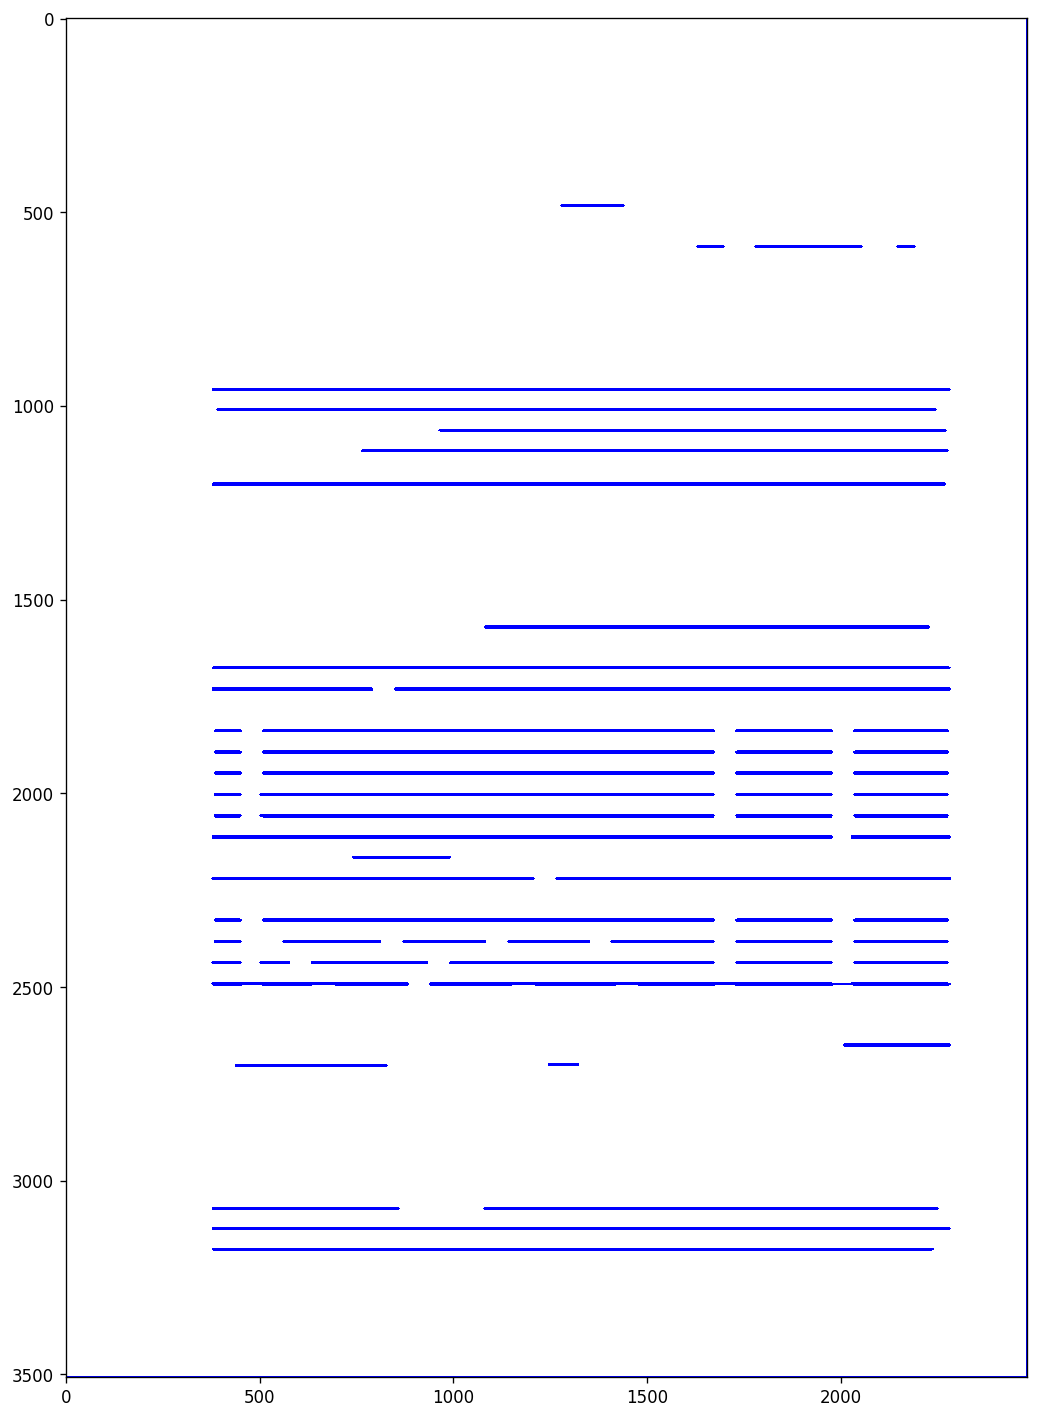

In [55]:
im2, contours, hierarchy = cv.findContours(dst, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
im2 = cv.cvtColor(im2, cv.COLOR_GRAY2BGR)
dst = cv.drawContours(im2, contours, -1, (0,0,255), 3)
plt_imshow(dst)

In [56]:
lines = list()
for c in contours:
    line = cv.fitLine(c, cv.DIST_L2, 0, 0.01, 0.01)
    lines.append(line)

In [58]:
import math
angles = list()
for l in lines:
    angle = np.arctan(l[1] / l[0])
    angles.append(np.rad2deg(angle))
    
sum(angles) / len(angles)

array([-1.4106895], dtype=float32)